# USL MID EXAM

##### DATA SET DESCRIPTION : 


The Avila data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.  
The palaeographic analysis of the manuscript has individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y). The data have has been normalized, by using the Z-normalization method.

Drop the labeled(Class) column from the dataset for the clustering purpose. If required used the label column for cluster quality evaluation purpose.



* F1	=intercolumnar distance
* F2=	upper margin
* F3	=lower margin
* F4	=exploitation
* F5	=row number
* F6	=modular ratio
* F7	=interlinear spacing
* F8	=weight
* F9	=peak number
* F10	=modular ratio/ interlinear spacing
* Class=	A, B, C, D, E, F, G, H, I, W, X, Y


In [ ]:
# Kindly change the below cells from markdown to code and execute it 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import csv

with open("avila.csv","r")as file:

    reader=csv.reader(file)
    
    df=pd.read_csv("avila.csv")

df.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Target
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [55]:
df['Target'].value_counts().count()

12

### 1. Data Understanding (8 marks)

#### a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols
& types of variables (continuous, categorical etc.)? (1 MARK)



In [3]:
df.shape

(10430, 11)

In [5]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [7]:
df.dtypes

F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
F6        float64
F7        float64
F8        float64
F9        float64
F10       float64
Target     object
dtype: object

In [56]:
df=df.drop('Target',axis=1)

#### b Calculate five-point summary for numerical variables (1 MARK) 

In [10]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


#### c. Summarize observations for categorical variables – no. of categories, % observations in each category.  (2 MARKS)

#### d. Generate the covariance and correlation tables for the data (2 MARKS)

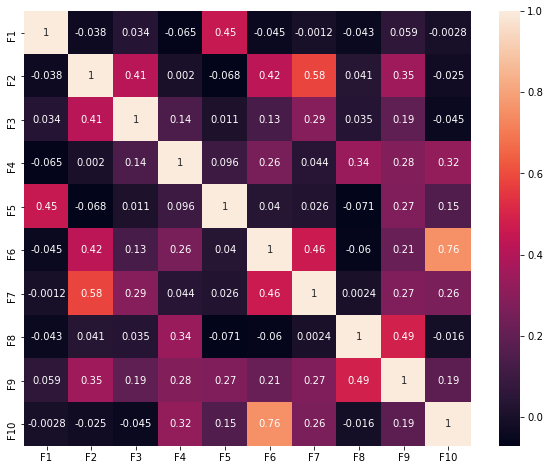

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### e. Create Visualization plots to find the relationship amongst the variables. (2 MARKS) 

In [28]:
df.shape

(10430, 10)

### 2. How will you decide when to apply PCA based on the correlation? (5 marks)

#### Apply PCA on the above dataset and determine the number of PCA components to be used so that 95% of the variance in data is explained by the same. (12 marks)

In [36]:
from sklearn.decomposition import PCA

In [20]:
cov_matrix = np.cov(df, rowvar=False)
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[16.66320528977927, 2.3772698354331743, 1.6990161840753606, 1.4539613167899759, 1.0551058670081677, 0.9219989779629962, 0.6052777023670459, 0.5703999550259485, 0.3212562813116661, 0.14346152527157113]


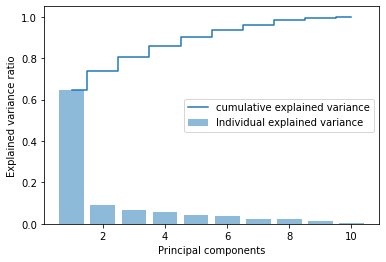

In [29]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained) 
plt.bar(range(1,11), var_explained, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,11),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [35]:
P_reduce = np.array(eigvectors_sort[0:5]).transpose()
Proj_data_2D = np.dot(df,P_reduce)
Proj_data_2D.shape

(10430, 5)

In [38]:
pca_again = PCA(0.95)
df_train_pca2 = pca_again.fit_transform(df)
df_train_pca2.shape

(10430, 7)

### 3. Use PCA dimensions to cluster the data. Apply K-means/ Agglomerative clustering based on the data. (25 Marks) Some pointers which would help you, but don’t be limited by these 

In [39]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

In [57]:
kmeans=KMeans(n_clusters=6,random_state=101)
kmeans.fit(df)
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df))
centroid_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.076661,-0.045740,0.137108,0.251848,0.215670,-0.230084,0.048861,0.513661,0.456589,-0.149317
1,0.000000,386.000000,50.000000,0.168104,0.000000,53.000000,83.000000,0.275032,44.000000,0.638020
2,-1.650954,12.933257,-0.555797,0.422469,-3.255209,-0.580953,-1.118939,1.527852,-1.372197,-0.992855
3,-0.002097,-0.109421,-0.169807,0.228824,0.128990,1.174153,0.238901,-0.415861,-0.191846,1.043837
4,0.389260,-0.072842,-0.194500,-1.051568,0.049630,-0.863629,-0.398207,-1.005655,-0.822871,-0.919962
5,-3.315243,0.278841,0.023469,-0.502153,-4.536135,-0.531421,-0.527425,0.319336,-1.269023,-0.748882


In [58]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['cluster_number']))
df['cluster_number'] = df_labels['cluster_number'].astype('category')
df.cluster_number.value_counts()

0    5579
3    2667
4    1824
5     316
2      43
1       1
Name: cluster_number, dtype: int64

#### a. Find the optimal K Value. (6 marks)

In [46]:
pca_again.explained_variance_ratio_

array([0.6455866 , 0.09210314, 0.0658254 , 0.05633118, 0.04087822,
       0.03572123, 0.02345042])

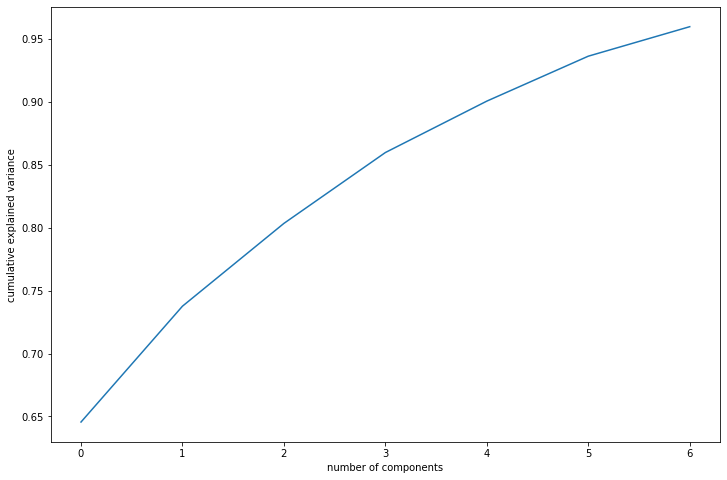

In [48]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_again.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [50]:
K = range(1, 10)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
 
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

1 : 2.624340817269789
2 : 2.586004023441005
3 : 2.4365102746357117
4 : 2.285979501156647
5 : 2.157643403416682
6 : 2.0391532782077295
7 : 2.003200782117901
8 : 1.895951123393249
9 : 1.8663394107776405


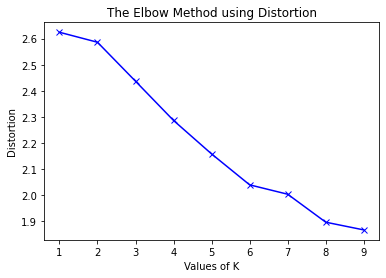

In [51]:
for key, val in mapping1.items():
    print(f'{key} : {val}')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#### b.	Apply Clustering and find out if the data points have been clustered correctly using appropriate visualization (8 marks)

In [60]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df, c = df.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'map'

<Figure size 576x576 with 0 Axes>

#### c.	Evaluate the clusters formed using appropriate metrics to support the model built. (6 marks)

#### d.Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. What changes from the base model had the most effect on model performance? (5 marks)